# **Object Detection**

**YOLOv11 model**

1) Install Ultralytics YOLOv11

In [7]:
pip install ultralytics


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


 2) To make sure dataset is loaded correctly. load images and their labels. check that the number of images matches the number of labels to avoid any errors. Then display 5 random images and their annotations.

Annotations for IMG_8494_jpg.rf.a68f75721ae7ee1a6bf2caa88aab6cc1.jpg:
['0 0.462890625 0.67578125 0.0751953125 0.4973958333333333\n', '4 0.4375 0.2578125 0.1015625 0.18880208333333334\n', '4 0.466796875 0.9088541666666666 0.107421875 0.17838541666666666']


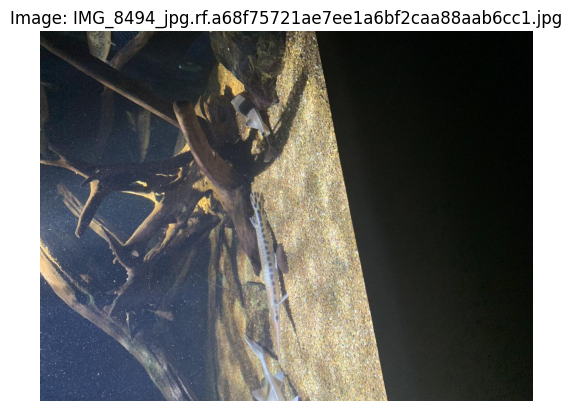

Annotations for IMG_2628_jpeg_jpg.rf.c607a4280b054d5a636f5ee3398b886d.jpg:
['6 0.4361979166666667 0.388671875 0.6861979166666666 0.4208984375']


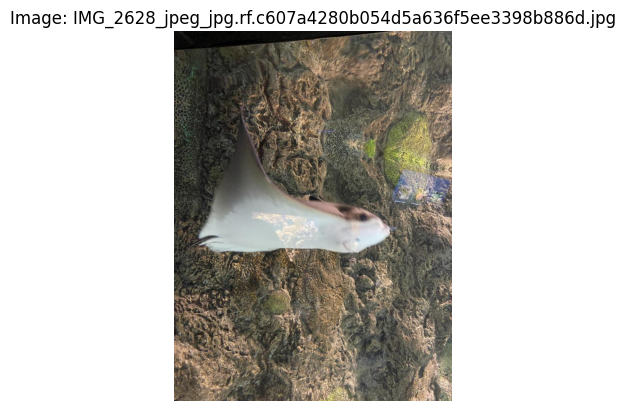

Annotations for IMG_8403_jpg.rf.eacd563b31d0cdecfb5f3b7e5c11c453.jpg:
['6 0.173828125 0.4752604166666667 0.1171875 0.3684895833333333\n', '0 0.8447265625 0.5260416666666666 0.1005859375 0.125\n', '0 0.9619140625 0.19401041666666666 0.0283203125 0.11848958333333333\n', '0 0.73828125 0.6419270833333334 0.091796875 0.11197916666666667\n', '0 0.3525390625 0.6940104166666666 0.0224609375 0.07682291666666667\n', '0 0.291015625 0.6966145833333334 0.017578125 0.06770833333333333\n', '0 0.1796875 0.7408854166666666 0.013671875 0.05859375\n', '0 0.22265625 0.69921875 0.0107421875 0.046875\n', '0 0.1708984375 0.6848958333333334 0.044921875 0.045572916666666664\n', '4 0.3603515625 0.4752604166666667 0.0693359375 0.4270833333333333']


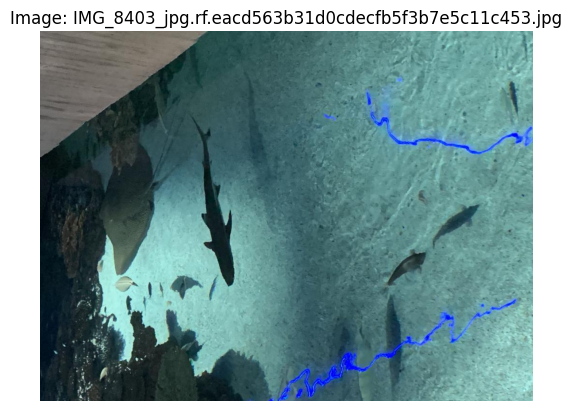

Annotations for IMG_8550_jpg.rf.7f9f25d5d968b77bc0664fb82fc9a9c9.jpg:
['0 0.3994140625 0.404296875 0.228515625 0.80859375']


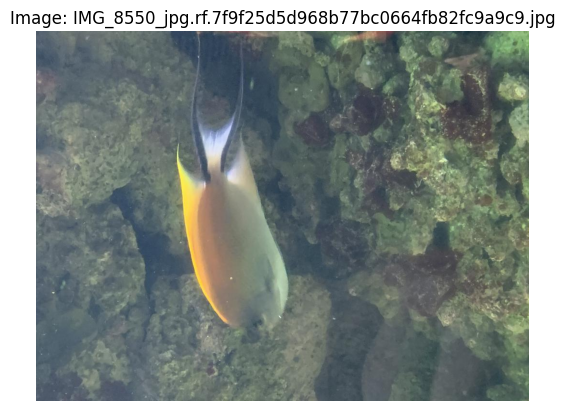

Annotations for IMG_3149_jpeg_jpg.rf.ec910aff6521c2af1a1bcbe5887b07f7.jpg:
['3 0.4231770833333333 0.3740234375 0.3658854166666667 0.423828125']


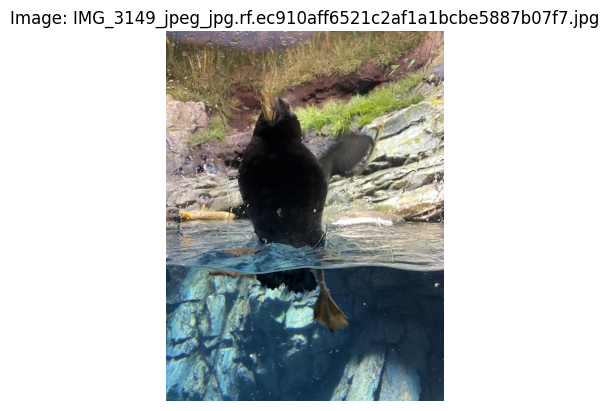

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import random
import time
from ultralytics import YOLO
from IPython.display import Image, display


train_path = r"C:\Users\96650\Downloads\Aquarium Object Detection Dataset\train\images"
test_path = r"C:\Users\96650\Downloads\Aquarium Object Detection Dataset\test"
valid_path = r"C:\Users\96650\Downloads\Aquarium Object Detection Dataset\valid\images"

# Function to load images and labels
def load_dataset(dataset_path):
    images_path = os.path.join(dataset_path, 'images')
    labels_path = os.path.join(dataset_path, 'labels')


    image_files = sorted([os.path.join(images_path, f) for f in os.listdir(images_path) if f.endswith('.jpg') or f.endswith('.png')])
    
    label_files = sorted([os.path.join(labels_path, f) for f in os.listdir(labels_path) if f.endswith('.txt')])

    # Check that number of images matches the number of labels
    assert len(image_files) == len(label_files), "Number of images and labels do not match!"

    return image_files, label_files


train_images, train_labels = load_dataset(r"C:\Users\96650\Downloads\Aquarium Object Detection Dataset\train")

# Function for displaying 5 random images with annotations
def display_random_images_with_labels(image_files, label_files, num_images=5):
    
    indices = random.sample(range(len(image_files)), num_images)
    for i in indices:
        
        img = cv2.imread(image_files[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        with open(label_files[i], 'r') as f:
            annotations = f.readlines()

        # Print the annotations
        print(f"Annotations for {os.path.basename(image_files[i])}:")
        print(annotations)

        plt.imshow(img)
        plt.title(f"Image: {os.path.basename(image_files[i])}")
        plt.axis('off')
        plt.show()

# Display 5 random images
display_random_images_with_labels(train_images, train_labels, num_images=5)

3) Train YOLOv11 model

In [11]:
model = YOLO("yolo11n.pt")   # or yolo11s.pt / yolo11m.pt etc.

results = model.train(
    data = r"C:\Users\96650\Downloads\Aquarium Combined.v2-raw-1024.yolov11\data.yaml",
    epochs = 25,
    imgsz = 640,
    batch = 16,
)


New https://pypi.org/project/ultralytics/8.3.233 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.230  Python-3.13.9 torch-2.9.1+cpu CPU (11th Gen Intel Core i7-1195G7 @ 2.90GHz)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\96650\Downloads\Aquarium Combined.v2-raw-1024.yolov11\data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, mult

5) Run Inference on Test Set & Save Results

In [12]:
test_results = model.predict(
    source= r"C:\Users\96650\Downloads\Aquarium Combined.v2-raw-1024.yolov11\test\images",
    save=True,        # save images with bounding boxes
    conf=0.25,
)



image 1/63 C:\Users\96650\Downloads\Aquarium Combined.v2-raw-1024.yolov11\test\images\IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg: 640x480 1 puffin, 2433.6ms
image 2/63 C:\Users\96650\Downloads\Aquarium Combined.v2-raw-1024.yolov11\test\images\IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg: 640x480 25 penguins, 2476.1ms
image 3/63 C:\Users\96650\Downloads\Aquarium Combined.v2-raw-1024.yolov11\test\images\IMG_2319_jpeg_jpg.rf.6e20bf97d17b74a8948aa48776c40454.jpg: 640x480 9 penguins, 3168.3ms
image 4/63 C:\Users\96650\Downloads\Aquarium Combined.v2-raw-1024.yolov11\test\images\IMG_2347_jpeg_jpg.rf.7c71ac4b9301eb358cd4a832844dedcb.jpg: 640x480 2 penguins, 1673.1ms
image 5/63 C:\Users\96650\Downloads\Aquarium Combined.v2-raw-1024.yolov11\test\images\IMG_2354_jpeg_jpg.rf.396e872c7fb0a95e911806986995ee7a.jpg: 640x480 9 penguins, 1636.2ms
image 6/63 C:\Users\96650\Downloads\Aquarium Combined.v2-raw-1024.yolov11\test\images\IMG_2371_jpeg_jpg.rf.54505f60b6706da151c1641

6) Display Detection Images with their bounding boxes

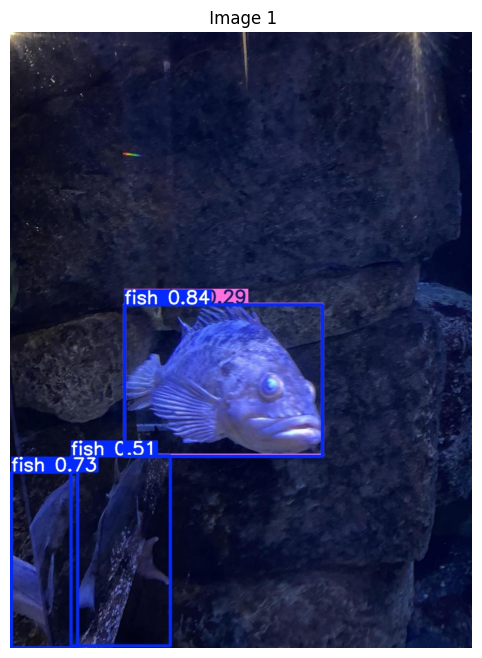

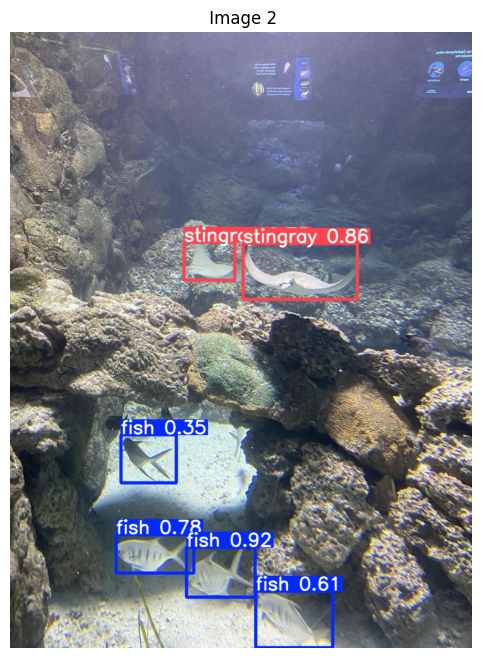

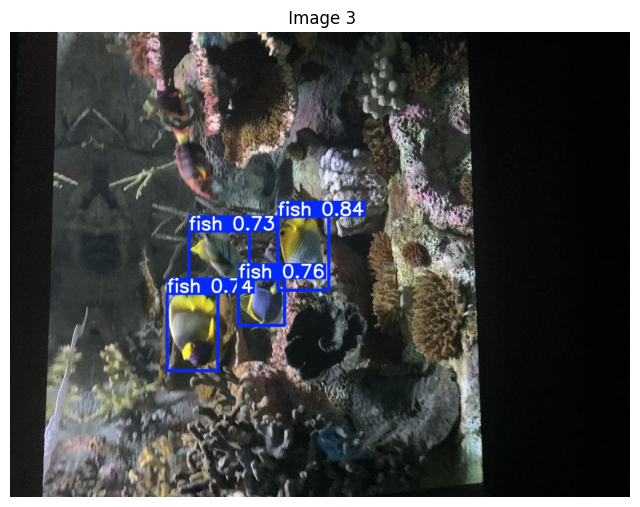

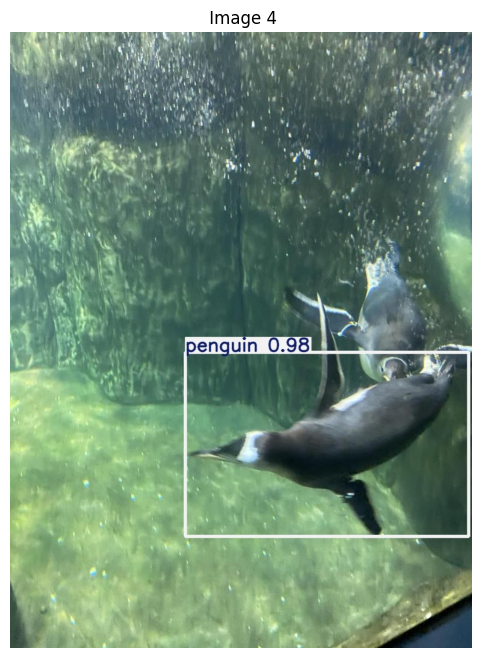

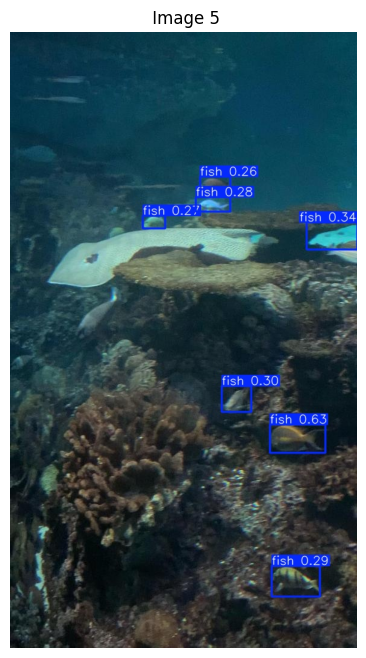

In [13]:
import os
import random
import matplotlib.pyplot as plt

# Path to the results folder
results_path = r"C:\Users\96650\Downloads\runs\detect\predict"

# Get the names of the images
image_files = [os.path.join(results_path, f) for f in os.listdir(results_path) if f.endswith(('.jpg', '.png'))]

# Select 5 random images
random_images = random.sample(image_files, min(5, len(image_files)))

# Display the random images
for i, img_path in enumerate(random_images):
    img = plt.imread(img_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f" Image {i+1}")
    plt.show()

7) Display confusion matrix

Ultralytics 8.3.230  Python-3.13.9 torch-2.9.1+cpu CPU (11th Gen Intel Core i7-1195G7 @ 2.90GHz)
val: Fast image access  (ping: 0.10.0 ms, read: 53.220.6 MB/s, size: 100.9 KB)
val: Scanning C:\Users\96650\Downloads\Aquarium Combined.v2-raw-1024.yolov11\valid\labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 127/127 72.7Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 12.2s/it 1:3812.1s
                   all        127        909      0.786      0.658      0.735      0.442
                  fish         63        459      0.849      0.662        0.8      0.451
             jellyfish          9        155      0.825      0.884      0.908      0.487
               penguin         17        104      0.631      0.702      0.665      0.313
                puffin         15         74      0.605      0.351       0.46      0.236
                 shark         28         57      0.768      0.614    

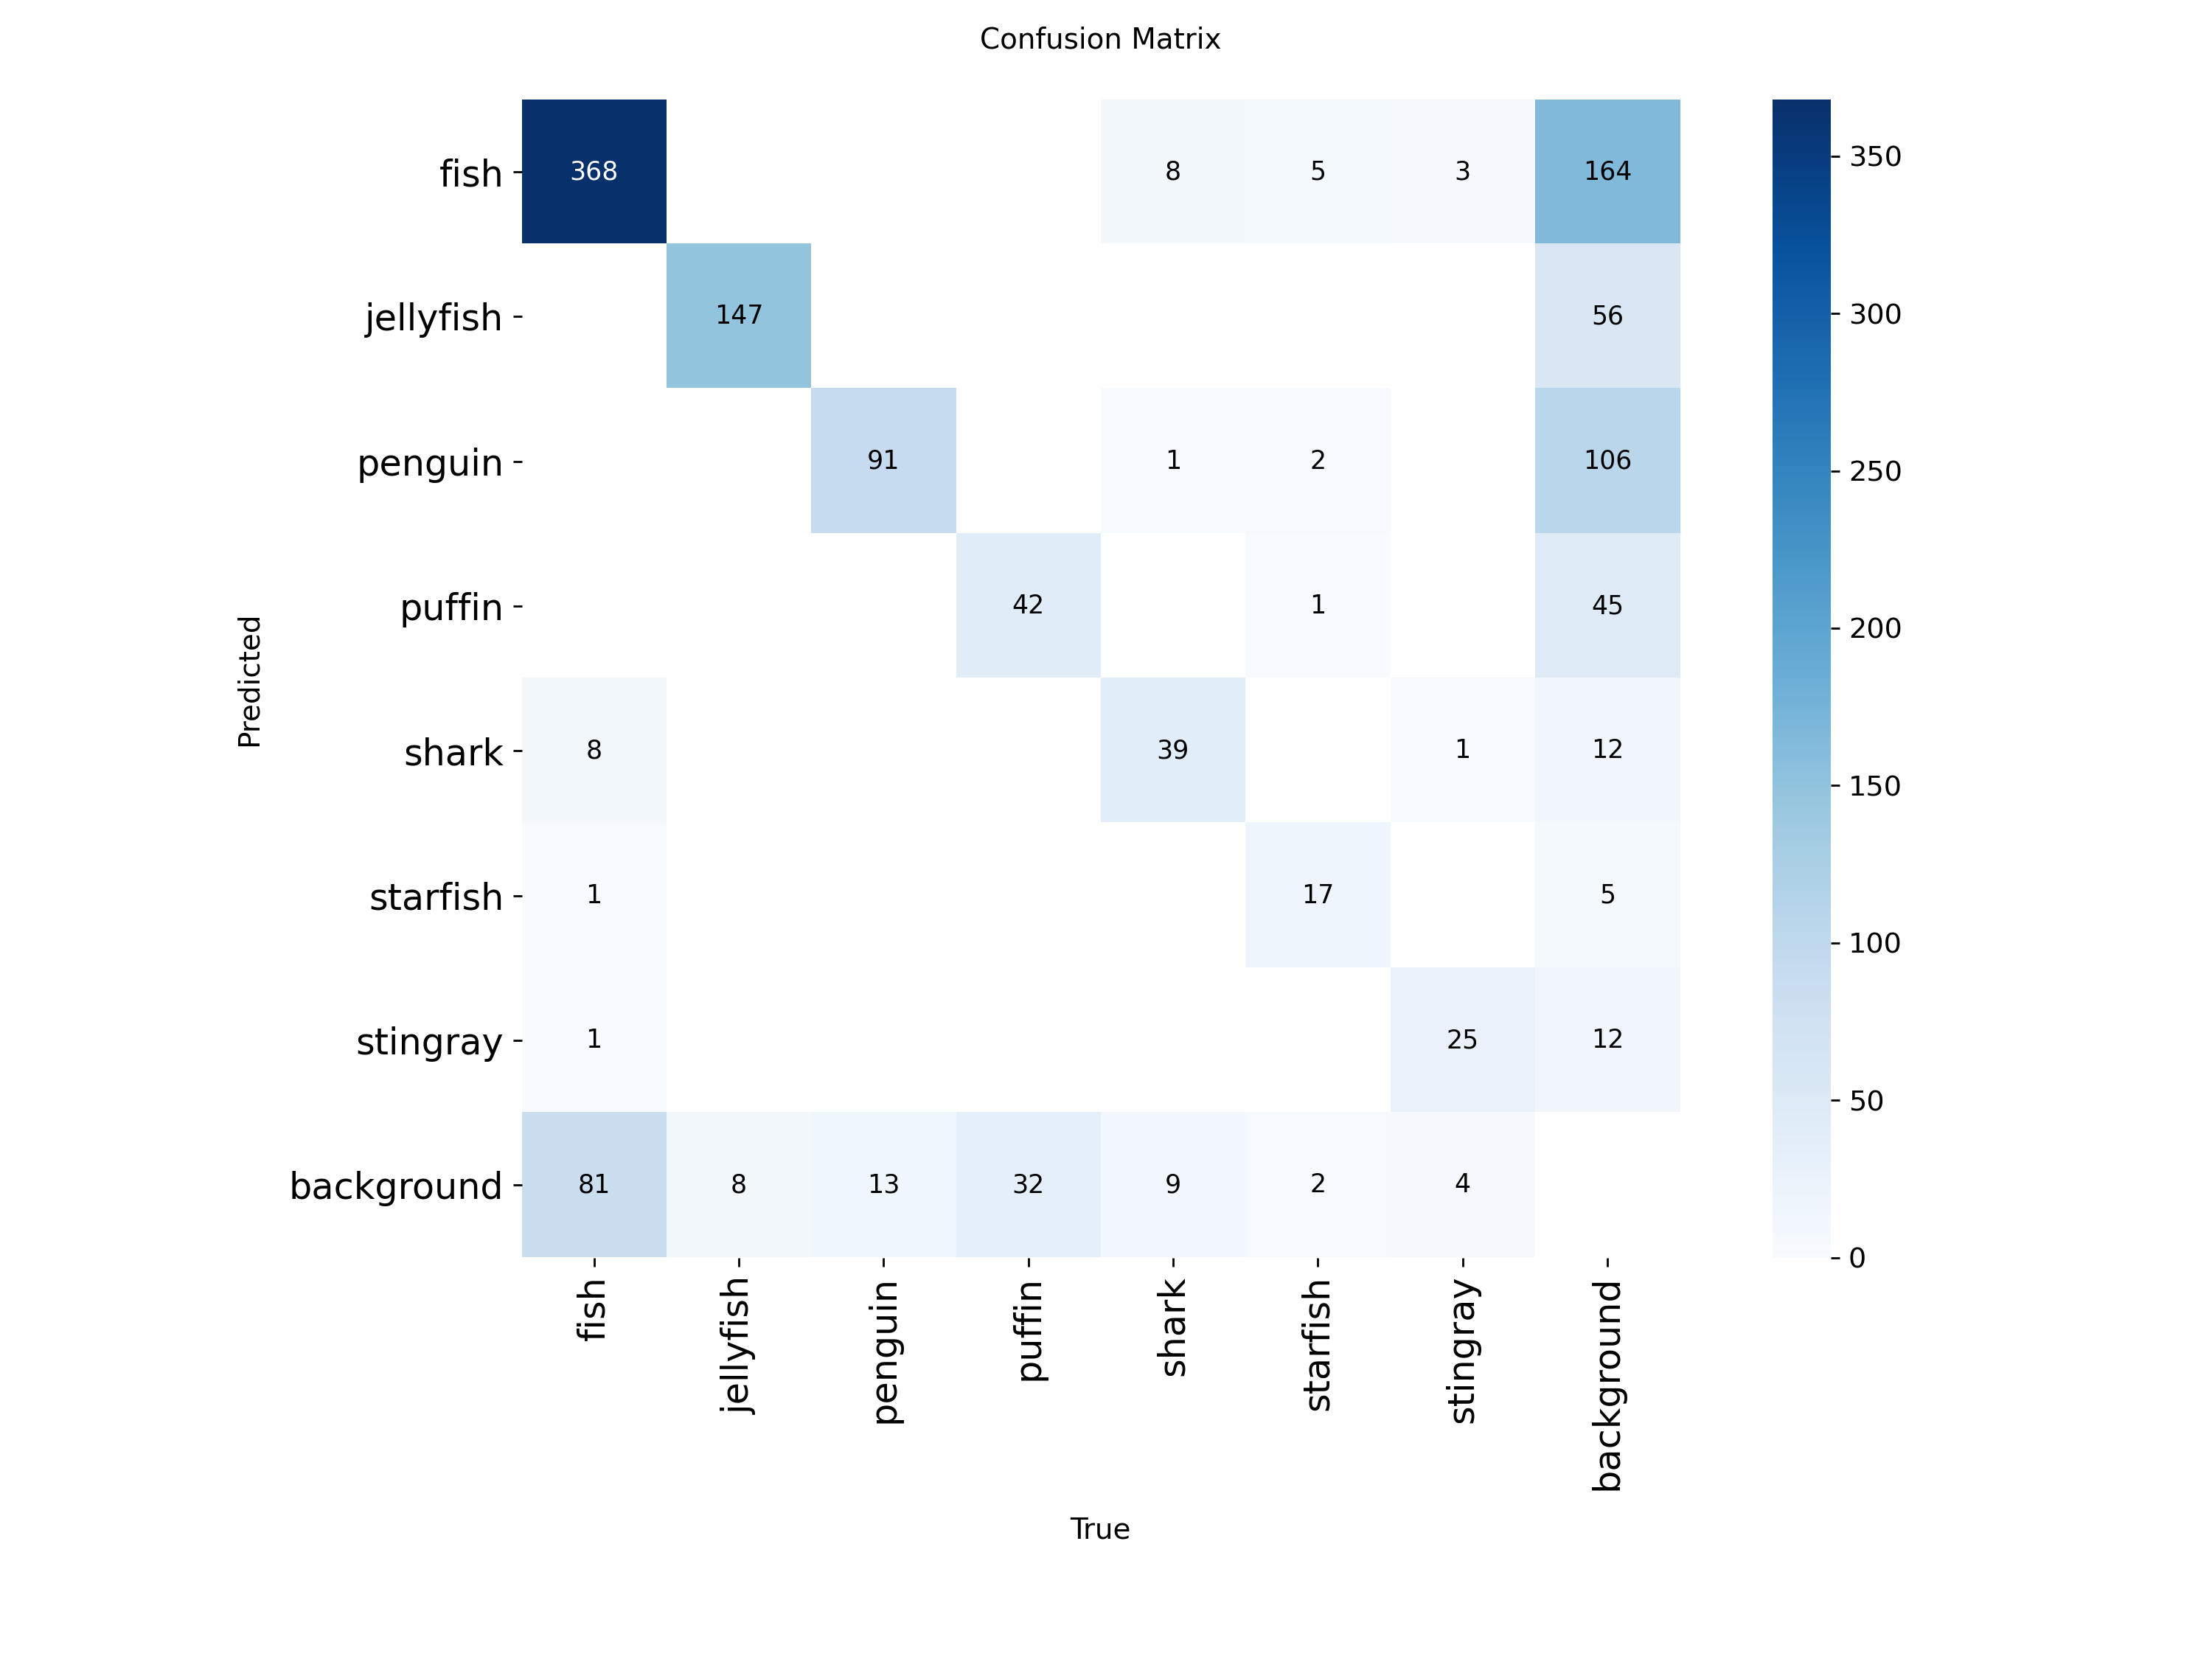

In [14]:
metrics = model.val(data = r"C:\Users\96650\Downloads\Aquarium Combined.v2-raw-1024.yolov11\data.yaml")

print("Confusion Matrix saved at:", metrics.save_dir)
display(Image(filename=f"{metrics.save_dir}/confusion_matrix.png"))


8) display Precision–Confidence Curve

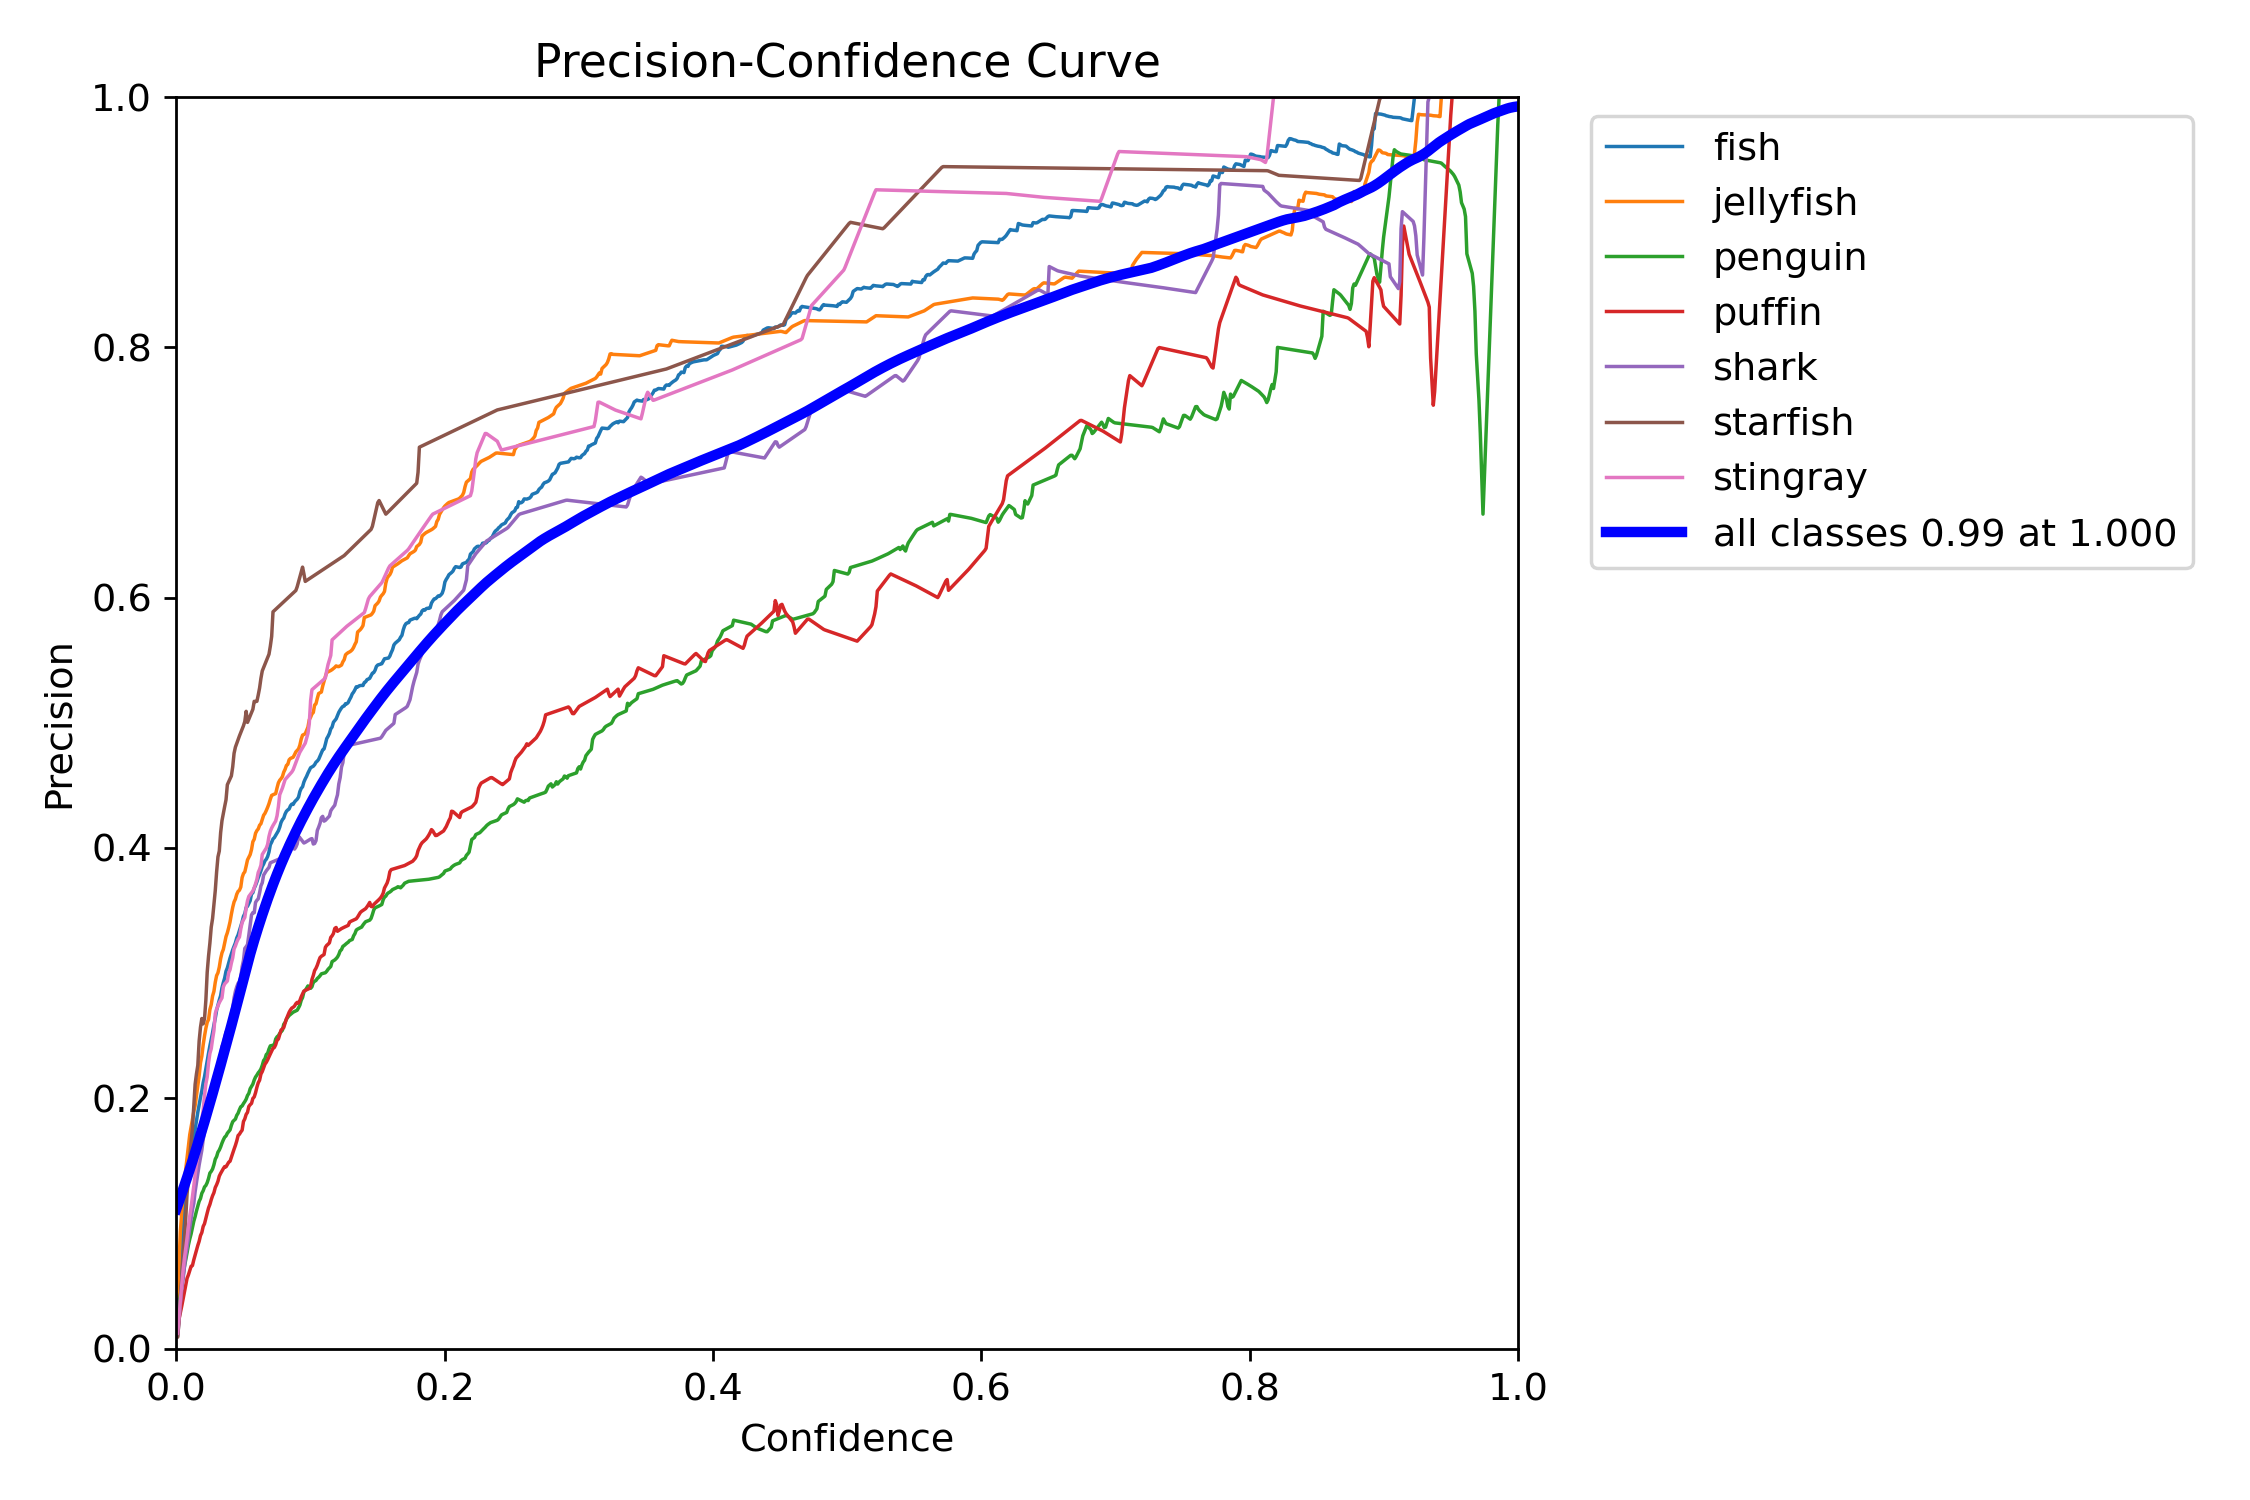

In [15]:

display(Image(filename=f"{metrics.save_dir}/BoxP_curve.png"))


9) display Precision–Recall Curve

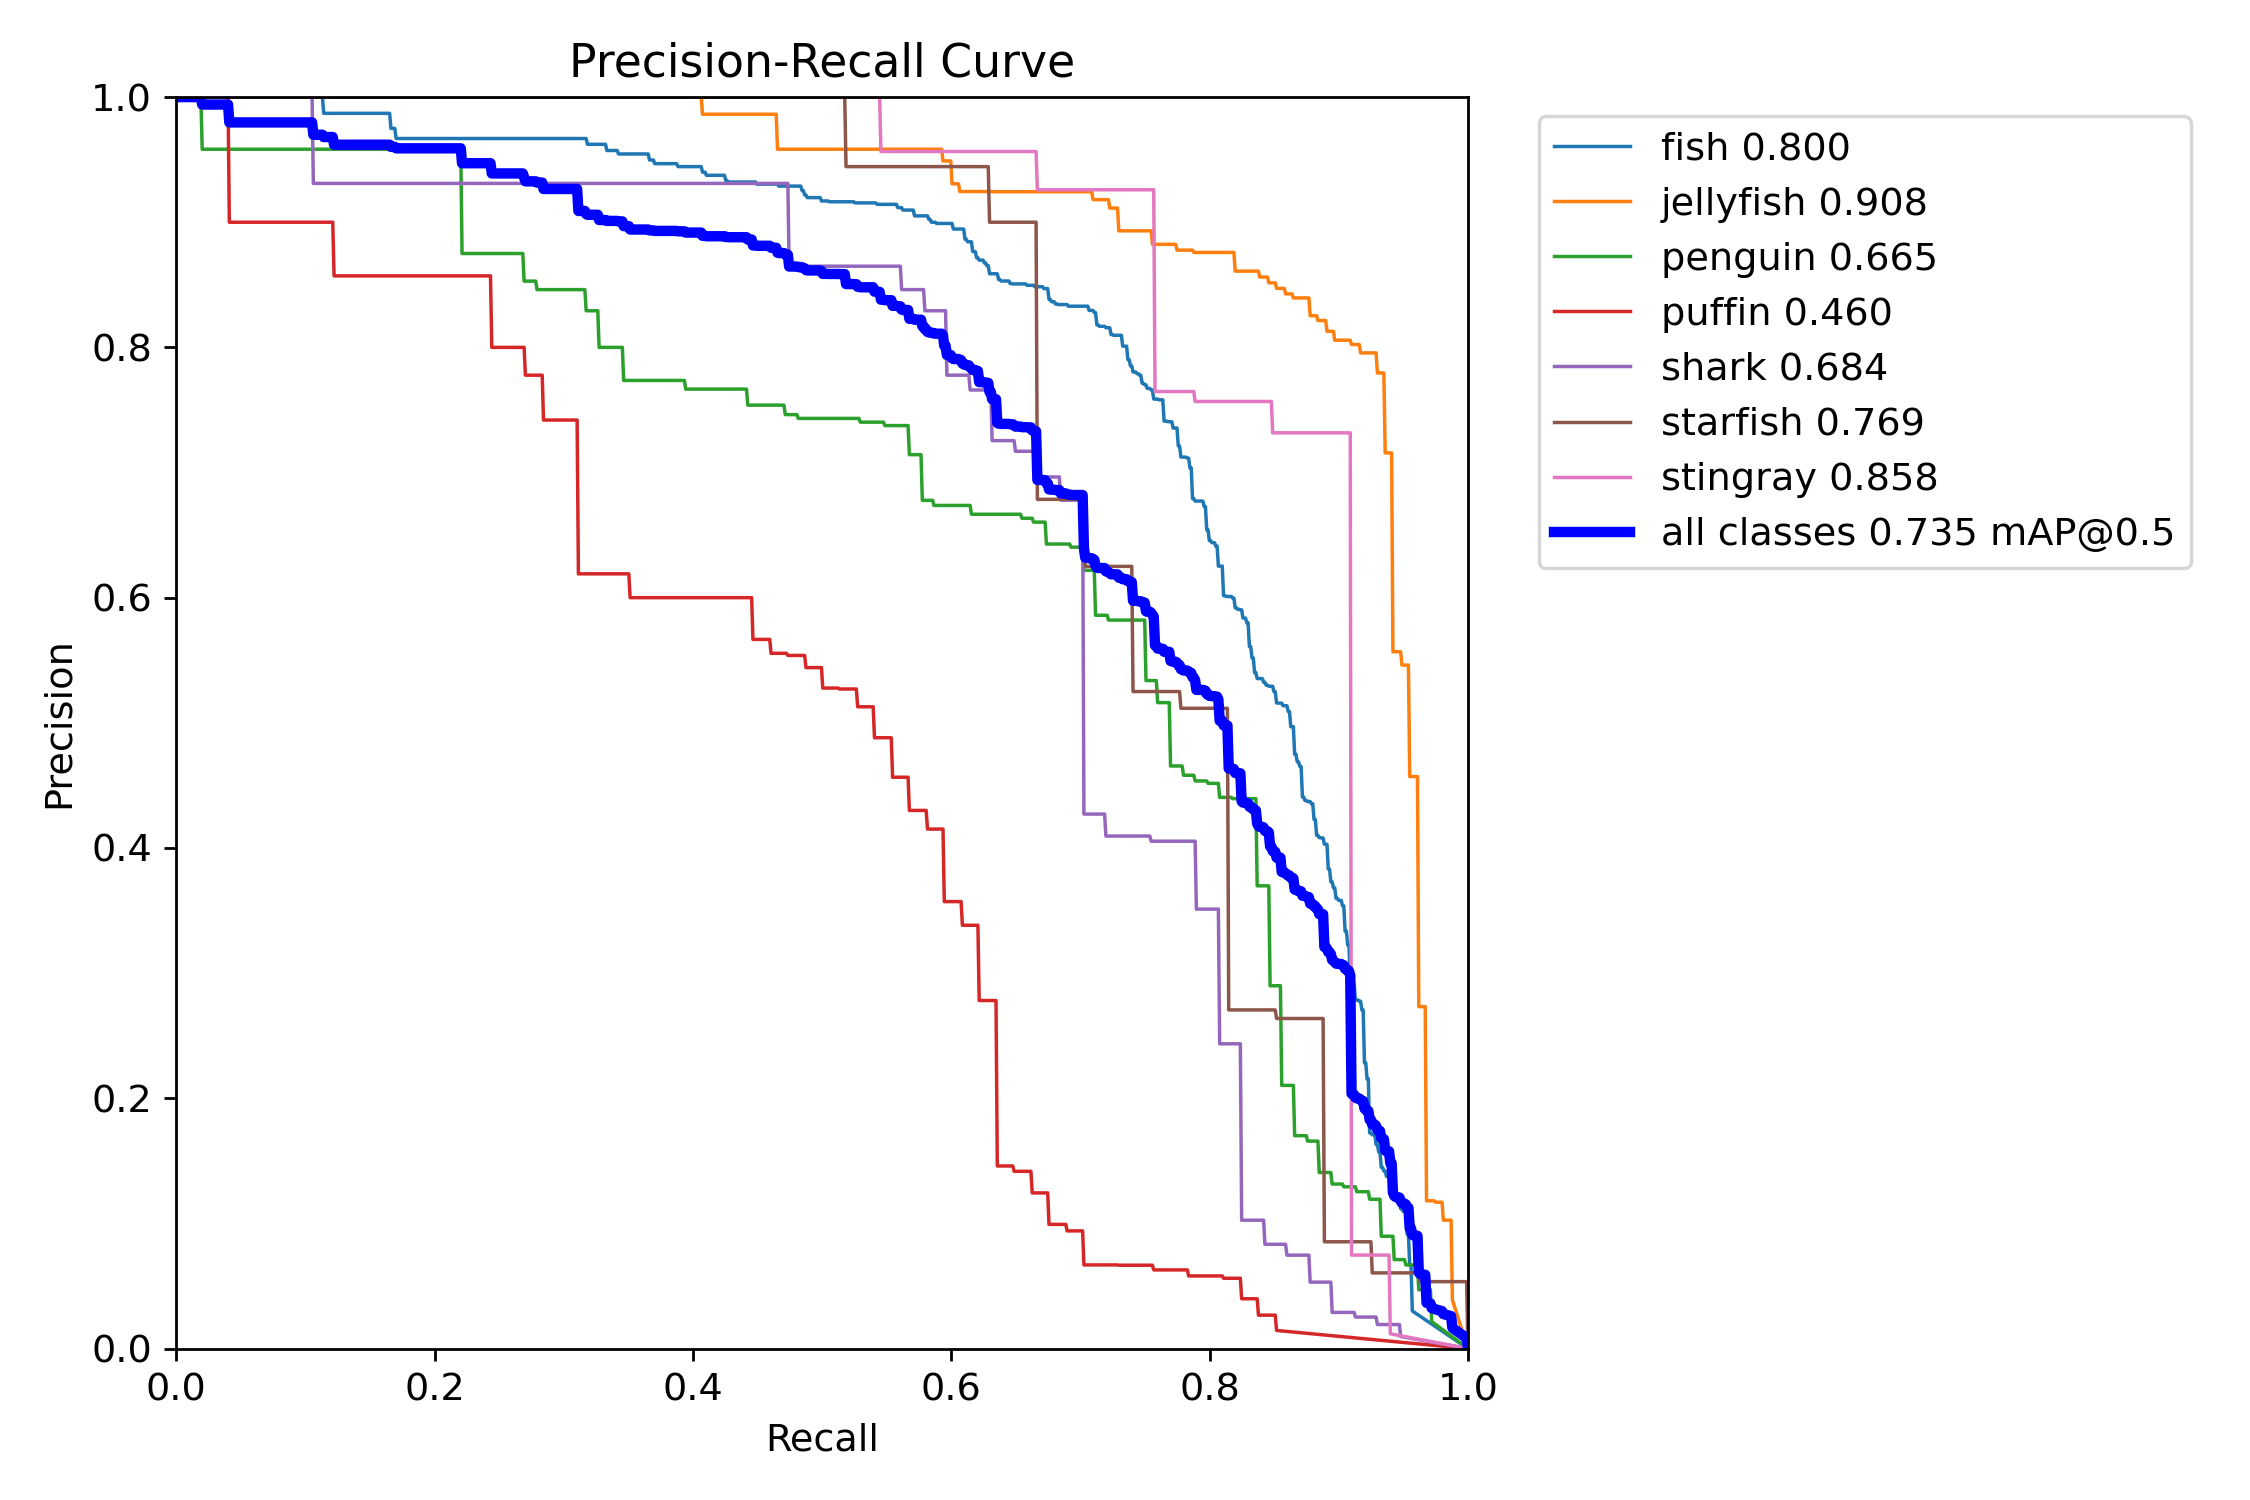

In [16]:
display(Image(filename=f"{metrics.save_dir}/BoxPR_curve.png"))

In [2]:
import os

metrics_dir = r"C:\Users\96650\Downloads\runs\detect\val4"
print(os.listdir(metrics_dir))


['BoxF1_curve.png', 'BoxPR_curve.png', 'BoxP_curve.png', 'BoxR_curve.png', 'confusion_matrix.png', 'confusion_matrix_normalized.png', 'val_batch0_labels.jpg', 'val_batch0_pred.jpg', 'val_batch1_labels.jpg', 'val_batch1_pred.jpg', 'val_batch2_labels.jpg', 'val_batch2_pred.jpg']


10) Calculate Inference Time

In [24]:
import numpy as np

# Load your YOLOv11 model
model = YOLO(r"C:\Users\96650\Downloads\yolo11n.pt")   # change to your weights

# Path to test images
test_path = r"C:\Users\96650\Downloads\Aquarium Combined.v2-raw-1024.yolov11\test\images"

# List all image files
image_files = [os.path.join(test_path, f) 
               for f in os.listdir(test_path) 
               if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

times = []

print("🔍 Measuring inference time...\n")

for img in image_files:
    start = time.time()

    model.predict(img, imgsz=640, conf=0.25, verbose=False)

    end = time.time()
    inference_time = end - start
    times.append(inference_time)

    print(f"🖼️ {os.path.basename(img)} → {inference_time:.4f} sec")

# Total inference time
total_time = np.sum(times)

# Average inference time
avg_time = np.mean(times)

print("\n==============================")
print(f"📌 Total Images: {len(image_files)}")
print(f"⏱️ Total Inference Time: {total_time:.4f} sec")
print(f"⚡ Average Inference Time per Image: {avg_time:.4f} sec")
print("==============================")


🔍 Measuring inference time...

🖼️ IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg → 0.1422 sec
🖼️ IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg → 0.1046 sec
🖼️ IMG_2319_jpeg_jpg.rf.6e20bf97d17b74a8948aa48776c40454.jpg → 0.1076 sec
🖼️ IMG_2347_jpeg_jpg.rf.7c71ac4b9301eb358cd4a832844dedcb.jpg → 0.0900 sec
🖼️ IMG_2354_jpeg_jpg.rf.396e872c7fb0a95e911806986995ee7a.jpg → 0.0978 sec
🖼️ IMG_2371_jpeg_jpg.rf.54505f60b6706da151c164188c305849.jpg → 0.0969 sec
🖼️ IMG_2379_jpeg_jpg.rf.7dc3160c937072d26d4624c6c48e904d.jpg → 0.0970 sec
🖼️ IMG_2380_jpeg_jpg.rf.a23809682eb1466c1136ca0f55de8fb5.jpg → 0.1037 sec
🖼️ IMG_2387_jpeg_jpg.rf.09b38bacfab0922a3a6b66480f01b719.jpg → 0.0870 sec
🖼️ IMG_2395_jpeg_jpg.rf.9f1503ad3b7a7c7938daed057cc4e9bc.jpg → 0.0900 sec
🖼️ IMG_2423_jpeg_jpg.rf.1c0901882e71d5ebd26f036f4e22da65.jpg → 0.1044 sec
🖼️ IMG_2434_jpeg_jpg.rf.8b20d3270d4fbc497c64125273f46ecb.jpg → 0.1082 sec
🖼️ IMG_2446_jpeg_jpg.rf.06ee05e92df8e3c33073147d8f595211.jpg → 0.1040 sec
🖼️ IMG_